# Red Wine Quality
[Kaggle page](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
import warnings 
warnings.filterwarnings("ignore")

## Data

In [3]:
df = pd.read_csv('winequality-red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Exploratory Data Analysis

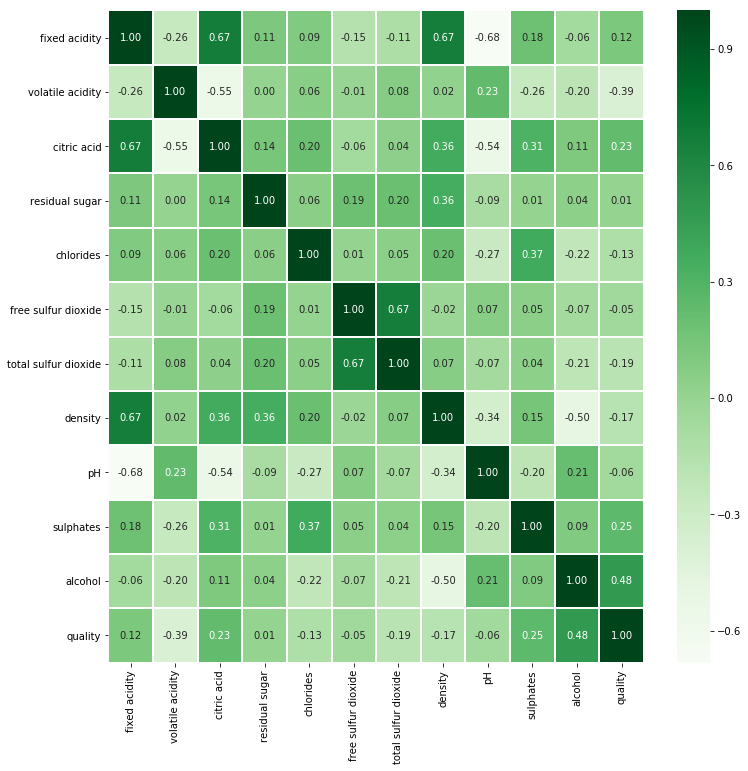

In [7]:
# Correlation plot
f, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(df.corr(), annot = True, linewidths = 1, fmt = '.2f', ax=ax, cmap="Greens");

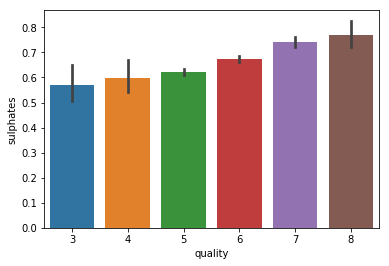

In [8]:
# Various barplots
sns.barplot(x='quality', y='sulphates', data=df);

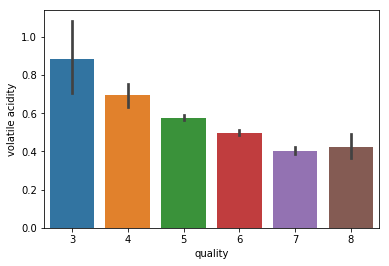

In [9]:
sns.barplot(x='quality', y='volatile acidity', data=df);

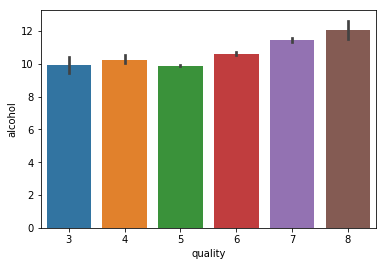

In [10]:
sns.barplot(x='quality', y='alcohol', data=df);

In [11]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [12]:
# Bucketing the quality variable (as recommended in project description)
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins, labels=group_names)

# Check if change was properly done
df['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

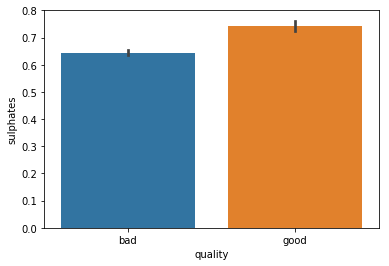

In [13]:
# Various barplots
sns.barplot(x='quality', y='sulphates', data=df);

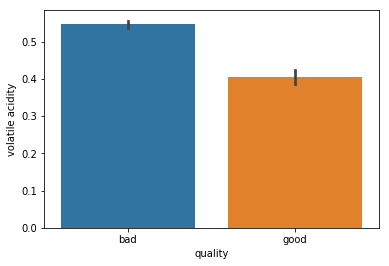

In [14]:
sns.barplot(x='quality', y='volatile acidity', data=df);

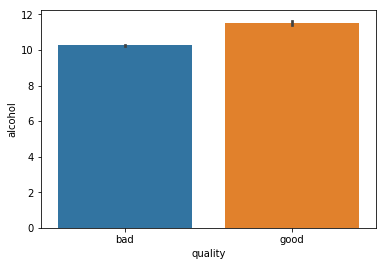

In [15]:
sns.barplot(x='quality', y='alcohol', data=df);

## Preprocessing

In [16]:
# Creating modelling datasets
X = df.drop(['quality'], axis=1)
y = df['quality']

# One-hot encoding our response variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Verify that there are only binary values in the response array
np.unique(y) # output range of values in response array

array([0, 1])

In [17]:
# Create training, testing and validation sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
242,7.7,0.58,0.10,1.8,0.102,28.0,109.0,0.99565,3.08,0.49,9.8
531,11.9,0.38,0.49,2.7,0.098,12.0,42.0,1.00040,3.16,0.61,10.3
568,9.8,0.50,0.49,2.6,0.250,5.0,20.0,0.99900,3.31,0.79,10.7
1098,8.0,0.31,0.45,2.1,0.216,5.0,16.0,0.99358,3.15,0.81,12.5
514,10.5,0.51,0.64,2.4,0.107,6.0,15.0,0.99730,3.09,0.66,11.8


In [19]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Inspect
X_train[:5]

array([[-0.36458197,  0.27028307, -0.88452628, -0.52477545,  0.28181672,
         1.18643738,  1.88446744, -0.58557889, -1.50331912, -0.96231644,
        -0.61284241],
       [ 2.08646306, -0.82422292,  1.09972703,  0.13151463,  0.20024397,
        -0.36725548, -0.12357452,  1.94514874, -0.98778743, -0.29662295,
        -0.13057021],
       [ 0.86094055, -0.16751933,  1.09972703,  0.05859351,  3.30000862,
        -1.0469961 , -0.78293158,  1.19925007, -0.02116552,  0.70191728,
         0.25524755],
       [-0.18950732, -1.20730002,  0.89621387, -0.30601209,  2.60664021,
        -1.0469961 , -0.90281468, -1.68844335, -1.05222889,  0.81286619,
         1.99142746],
       [ 1.26944805, -0.11279403,  1.86290138, -0.08724873,  0.38378266,
        -0.9498903 , -0.93278545,  0.29351597, -1.43887765, -0.01925067,
         1.31624638]])

## Modelling (Support Vector Machine)

### Default Parameter Model

In [20]:
%%time

# Create classifier
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=42)
classifier.fit(X_train, y_train)

# Generate predictions on test and validation set
y_pred_test = classifier.predict(X_test)
y_pred_val = classifier.predict(X_val)

CPU times: user 65.9 ms, sys: 27.4 ms, total: 93.3 ms
Wall time: 131 ms


In [21]:
# Plot SVM!
from mlxtend.plotting import plot_decision_regions

# Plot Decision Region using mlxtend's awesome plotting function
#plot_decision_regions(X=y_test, 
#                      y=y_pred_test,
#                      clf=classifier, 
#                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
#plt.xlabel(X.columns[0], size=14)
#plt.ylabel(X.columns[1], size=14)
#plt.title('SVM Decision Region Boundary', size=16)

In [113]:
# Metrics on test
from sklearn.metrics import confusion_matrix, accuracy_score
cm_test = confusion_matrix(y_test, y_pred_test)
accuracy_score(y_test, y_pred_test)

0.871875

In [114]:
# Metrics on validation
cm_val = confusion_matrix(y_val, y_pred_val)
accuracy_score(y_val, y_pred_val)

0.890625

### Grid Search & Cross-Validation Backed Model

In [149]:
# Cross-validate (10 fold)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("mean accuracy: " + str(round(accuracies.mean(),6)))
print("standard dev: " + str(round(accuracies.std(),6)))

mean accuracy: 0.887595
standard dev: 0.015839


In [137]:
%%time

# Grid search for optimal hyperparameters
from sklearn.model_selection import GridSearchCV

# Specify search space
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

# Perform grid search and print best accuracy along with optimal parameters
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10)
grid_search.fit(X_train, y_train)

# Output optimal combination
print("Best parameters: " + str(grid_search.best_params_))
print("Best score: " + str(grid_search.best_score_))

Best parameters: {'C': 1, 'gamma': 0.6, 'kernel': 'rbf'}
Best score: 0.8973607038123167
CPU times: user 3min 11s, sys: 935 ms, total: 3min 12s
Wall time: 3min 15s


In [145]:
# Create and fit optimal model
optimal_classifier = SVC(C=1.0, kernel='rbf', gamma=0.6)
optimal_classifier.fit(X_train, y_train)

# Predictions
y_pred_test_op = optimal_classifier.predict(X_test)
y_pred_val_op = optimal_classifier.predict(X_val)

In [147]:
# Testing metrics
accuracy_score(y_test, y_pred_test_op)

0.89375

In [148]:
# Validation metrics
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_val, y_pred_val_op)

0.91015625

### Conclusion

|   | Test accuracy  |  Validation accuracy |
|:-:|:-:|:-:|
| Default  | 0.871875 | 0.890625 |
| Optimal  | 0.893750 | 0.910156 |

### SVM Plotting References
* needs further testing for my application

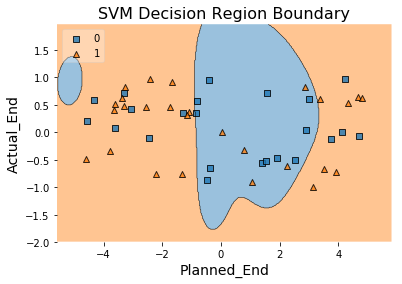

In [136]:
import sys
from sklearn import svm

# Create arbitrary dataset for example
df2 = pd.DataFrame({'Planned_End': np.random.uniform(low=-5, high=5, size=50),
                   'Actual_End':  np.random.uniform(low=-1, high=1, size=50),
                   'Late':        np.random.randint(low=0,  high=2, size=50)}
)

# Fit Support Vector Machine Classifier
X = df2[['Planned_End', 'Actual_End']]
y = df2['Late']

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X.values, y.values) 

# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=clf, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16);